In [1]:
import pandas as pd
f_path = r"C:\Users\KIM\Downloads\archive (9)\insurance.csv"
df = pd.read_csv(f_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [4]:
df['charges'].min()

1121.8739

In [5]:
df['charges'].max()

63770.42801

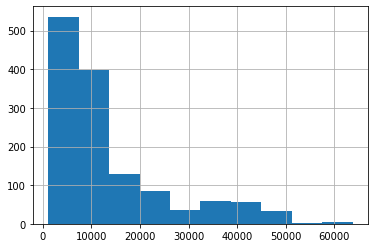

In [6]:
df['charges'].hist()

In [7]:
df['label'] = df['charges'] // 5000

In [8]:
df.loc[df['label'] >= 6,'label'] = 6

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges,label
0,19,female,27.900,0,yes,southwest,16884.92400,3.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0
3,33,male,22.705,0,no,northwest,21984.47061,4.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0


In [56]:
df['label'].unique()

array([3., 0., 4., 1., 5., 2., 6.])

In [14]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'label'],
      dtype='object')

In [20]:
from sklearn import preprocessing

for col in [ 'sex',  'smoker', 'region']:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges,label
0,19,0,27.900,0,1,3,16884.92400,3.0
1,18,1,33.770,1,0,2,1725.55230,0.0
2,28,1,33.000,3,0,2,4449.46200,0.0
3,33,1,22.705,0,0,1,21984.47061,4.0
4,32,1,28.880,0,0,1,3866.85520,0.0


In [57]:
X = df[df.columns.tolist()[:-2]]
y = df['label']

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,age,sex,bmi,children,smoker,region
1046,43,0,25.080,0,0,0
682,39,1,35.300,2,1,3
1037,45,0,30.495,1,1,1
490,19,0,32.900,0,0,3
39,60,1,39.900,0,1,3
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0
860,37,0,47.600,2,1,3


In [61]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth = 4)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8415178571428571

In [60]:
clf.score(X_test, y_test)

0.7986425339366516

In [46]:
y_pred = clf.predict(X)

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred, labels=[ 3.,  0.,  4.,  1.,  5.,  2.,  7., 10.,  9.,  6.,  8., 12., 11.])

array([[ 35,  22,   0,  26,   0,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0, 348,   0,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  5,  12,   0,  39,   0,  16,   0,   0,   0,   0,   0,   0,   0],
       [  0,  29,   0, 289,   0,  35,   0,   0,   0,   0,   0,   0,   0],
       [  0,   4,   0,  21,   0,  14,   0,   0,   0,   0,   0,   0,   0],
       [  3,  15,   0, 117,   0, 133,   0,   0,   0,   0,   0,   0,   0],
       [  0,  31,   0,  19,   0,   3,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  18,   0,  13,   0,   0,   0,   0,   0,   0,   0],
       [  1,  18,   0,   9,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   5,   0,  25,   0,  11,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

In [51]:
from sklearn.metrics import f1_score
f1_score(y, y_pred, average='weighted')

0.5277736417688412

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.5926339285714286

In [45]:
clf.score(X_train, y_train)

0.5926339285714286